<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-machine-learning-?" data-toc-modified-id="What-is-machine-learning-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is machine learning ?</a></span><ul class="toc-item"><li><span><a href="#What-about-a-quick-example?" data-toc-modified-id="What-about-a-quick-example?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What about a quick example?</a></span></li></ul></li><li><span><a href="#Prepare-your-data" data-toc-modified-id="Prepare-your-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare your data</a></span><ul class="toc-item"><li><span><a href="#Clean-and-process-your-data" data-toc-modified-id="Clean-and-process-your-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clean and process your data</a></span><ul class="toc-item"><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Scaling the data</a></span></li><li><span><a href="#Deal-with-named-label-and-categorical-data" data-toc-modified-id="Deal-with-named-label-and-categorical-data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Deal with named label and categorical data</a></span></li><li><span><a href="#Full-tipsy-pre-processing" data-toc-modified-id="Full-tipsy-pre-processing-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Full tipsy pre-processing</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Dimension-reduction" data-toc-modified-id="Dimension-reduction-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dimension reduction</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Sensitivity-Analysis" data-toc-modified-id="Sensitivity-Analysis-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Sensitivity Analysis</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Multivariate-Linear-Regression" data-toc-modified-id="Multivariate-Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multivariate Linear Regression</a></span></li><li><span><a href="#Suport-Vector-Machine-and-Kernel-trick" data-toc-modified-id="Suport-Vector-Machine-and-Kernel-trick-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Suport Vector Machine and Kernel trick</a></span></li><li><span><a href="#Decision-tree-and-Random-Forest" data-toc-modified-id="Decision-tree-and-Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision tree and Random Forest</a></span></li></ul></li><li><span><a href="#Classification---Who-has-a-pickup?" data-toc-modified-id="Classification---Who-has-a-pickup?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification - Who has a pickup?</a></span></li></ul></div>

In [72]:
import warnings
warnings.filterwarnings("ignore")

# A quick introduction to Machine Learning
**SIMUREX 2018 Workshop**

*Nicolas Cellier*

Disclaimer :


## What is machine learning ?

Give to computer the ability to "learn" how to do prediction without explicitly programmed. Instead, it "evolves" thanks to external data.

They exists two kind of ML algorithm :
- Regression: given some data, we try to predict the value of the output.
- Classification: given some data, we try to classify the output between category.

These last ones can be :
- Supervised: we have some labeled samples.
- Unsupervised: we do not know the category, the algorithm have to guess how to separate the samples.

*Some vocabulary (mine, not universal)*

- Model: an application that, given some inputs X return one or more output y.
- Feature: an input variable used in making predictions.
- Label: in supervised learning, the "answer" or "result" portion of an example.
- Example or sample: one row of a data set. An example contains one or more features and possibly a label.
- Set: a serie of examples
- Training set: the subset of the data set used to train a model.
- Validation set: a subset of the data set —disjunct from the training set— that you use to adjust hyperparameters.
- Parameter: a variable of a model that the ML system trains on its own. For example, weights are parameters whose values the ML system gradually learns through successive training iterations.
- Hyperparameter: the "knobs" that you tweak during successive runs of training a model

### What about a quick example?

The simplest ML algorithm : *The linear regression*

The data will be the tip amount in a restaurant : we will try to predict how many people tip, given some data and especialy their total bill.

In [18]:
import pandas as pd
import pylab as pl
pl.style.use("publication")

%matplotlib inline

In [23]:
# The data is available via the seaborn stat package
dataframe = sns.load_dataset("tips")
dataframe.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


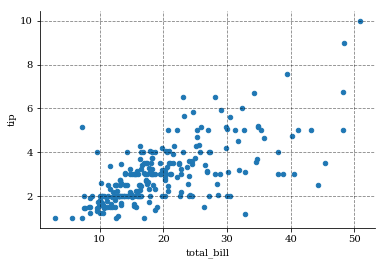

In [25]:
# We plot the data
dataframe.plot("total_bill", "tip", kind="scatter");

Here, the `total_bill` is the only *feature* `x`, and `tip` is the *label* `y`. We will try to train an algorithm to predict the later with the former.

A monovariate linear regression try to adjust the *parameters* `a` and `b` in the equation

$y = a x + b$

This very simple algorithm have no hyperparameter, and you can manually adjust the weights with a ruler.

Let's see how to do this with `scikit-learn` !

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

First, we have to get the feature column X, with a shape (n samples, n features). In our case, a shape (n samples, 1).

The label vector will be a simple row.

In [36]:
X = dataframe.total_bill.values.reshape(-1, 1)
y = dataframe.tip.values

Then, we have to split the examples into two set: a *training set* and a *test set*. The first one will fed the model, and the second will be used to test the model predictions.

By default, 1 / 4 is used for testing, 3 / 4 to fit the model.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

We can then initialize our model, feed it with our training set and show the prediction.

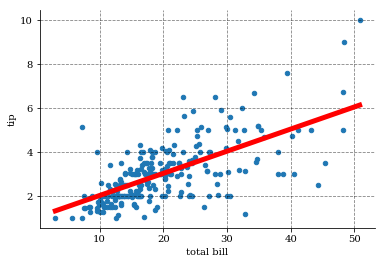

In [57]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# We create a evenly spaced total_bills for prediction
x_ = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# We ask our model to predict what sould be the tip
y_ = linear_reg.predict(x_)

dataframe.plot("total_bill", "tip", kind="scatter");
pl.plot(x_, y_, color="red", linewidth=5)
pl.xlabel("total bill")
pl.ylabel("tip");

To have a quantification of the quality of our model, we can use the $R^2$ (closest to 1 the better), or the mean squared error (less the better). They have to run on the *test set*.

In [60]:
print(f"Mean squared error: {mean_squared_error(y_test, linear_reg.predict(X_test)):g}")
print(f"R²: {r2_score(y_test, linear_reg.predict(X_test)):g}")

Mean squared error: 0.870169
R²: 0.422985


The results are not very good : a simple algorithm on only one feature may not be enough.

## Prepare your data

One important then often forgotten step is the data pre-processing.

You have to ensure to have clean input data first, then work on it to improve the algorithms performance.

### Clean and process your data

Because we use well known and clean dataset, cleaning the data will not be aborded here, but be carefull with

- encoding (UTF8, latin-1, ascii ?)
- Case specificity for string
- Outliers
- Non-aligned datetime
- ...

Which are non-trivial for real-life data and that can take a lot of time.

For the processing, the main points are :

#### Scaling the data

A lot of algorithms depend of the input ranges : using a feature with a huge delta will have more importance that one with a smaller range.

Solution : remove the mean and scale to unit variance

Lucky us : this is available in scikit-learn via the `StandardScaler`.

In [87]:
from sklearn.preprocessing import StandardScaler

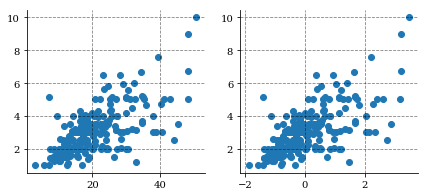

In [88]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

fig, axs = pl.subplots(1, 2, figsize=(7, 3))
axs[0].scatter(X, y)
axs[1].scatter(X_scaled, y)

This object allows us to reverse the scaling :

In [89]:
np.isclose(sc.inverse_transform(X_scaled), X).all()

True

#### Deal with named label and categorical data

In [110]:
dataframe.sex.sample(5)

69       Male
29     Female
55       Male
226    Female
153      Male
Name: sex, dtype: category
Categories (2, object): [Male, Female]

Algorithm does not deal well with strings. A simple way to deal with that is to assign each category with an integer.

In [97]:
from sklearn.preprocessing import OrdinalEncoder

In [151]:
ce = OrdinalEncoder()
Xsex = ce.fit_transform(dataframe[["sex"]])
print(Xsex[:5])
print(ce.inverse_transform(Xsex[:5]))

[[0.]
 [1.]
 [1.]
 [1.]
 [0.]]
[['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Female']]


Hourray ! We can use this as model input now.

But what about the week days?

In [109]:
dataframe.day.sample(5)

105     Sat
210     Sat
176     Sun
23      Sat
77     Thur
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

***Do not do that***

In [150]:
ce = OrdinalEncoder()
Xday = ce.fit_transform(dataframe[["day"]])
print(Xday[:5])
print(ce.inverse_transform(Xday[:5]))

[[2.]
 [2.]
 [2.]
 [2.]
 [2.]]
[['Sun']
 ['Sun']
 ['Sun']
 ['Sun']
 ['Sun']]


Some day of the week will be interpreted as having more importance that other

In [119]:
ce.inverse_transform([[0], [1], [2], [3]])

array([['Fri'],
       ['Sat'],
       ['Sun'],
       ['Thur']], dtype=object)

Solution : *assign one column per category, which have 0 or 1 as values*, Available via the `OneHotEncoder`!

In [120]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
ohe = OneHotEncoder()
Xday = ohe.fit_transform(dataframe[["day"]])
np.concatenate([dataframe[["day"]], Xday.A], axis=1)

array([['Sun', 0.0, 0.0, 1.0, 0.0],
       ['Sun', 0.0, 0.0, 1.0, 0.0],
       ['Sun', 0.0, 0.0, 1.0, 0.0],
       ...,
       ['Sat', 0.0, 1.0, 0.0, 0.0],
       ['Sat', 0.0, 1.0, 0.0, 0.0],
       ['Thur', 0.0, 0.0, 0.0, 1.0]], dtype=object)

#### Full tipsy pre-processing

In [148]:
dataframe.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [322]:
sc = StandardScaler()
oc_sex = OrdinalEncoder()
oc_smoke = OrdinalEncoder()
ohe_day = OneHotEncoder(sparse=False)
ohe_time = OneHotEncoder(sparse=False)
X1 = dataframe[["total_bill"]]
X2 = oc_sex.fit_transform(dataframe[["sex"]])
X3 = oc_smoke.fit_transform(dataframe[["smoker"]])
X4 = ohe_day.fit_transform(dataframe[["day"]])
X5 = ohe_time.fit_transform(dataframe[["time"]])
X6 = dataframe[["size"]]

X = sc.fit_transform(np.concatenate([X1, X2, X3, X4, X5, X6], axis=1))
X.shape

(244, 10)

In [323]:
y = dataframe[["tip"]]

### Feature engineering

***We are not google***

![](https://imgs.xkcd.com/comics/machine_learning.png)

We cannot afford that huge clusters, or Petabytes of data. We need to be clever.

Moreover, we need to deal with the [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) : A typical rule of thumb is that there should be at least 5 training examples for each dimension in the representation. (in our case, 50. We are good !).

It's great to try to reduce the number of features, or to transform them to increase their relevance.

Time series are very great examples : instead of having one input per hour (or minutes / seconds), we can instead use the main Fourier modes, which will give us information on periodicity.

#### Dimension reduction

##### Principal Component Analysis

Is a tool that allow to transform correlated input variables into linearly uncorrelated variables called principal components.

It can be used to heavily reduce the dimensionality input yet keeping some distance properties intact.

In [185]:
from sklearn.decomposition import PCA

In [260]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

##### Sensitivity Analysis

In case of sensitivity analysis, we try to quantify how much each $X_i$ variance in responsible of the $y$ variance.

Results can be given with sensitivity analysis, defined between 0 and 1 (0 ~ no impact, 1 ~ max impact).

Different algorithm, most of them available via SALib.

`rbd-fast` is one of them needing the less of examples to work.

Should need a proper sampling (Latin-Hypercube-Sampling), but can give some clue even with badly sampled examples (as ours...).

In [188]:
from SALib.analyze import rbd_fast

In [190]:
problem = {
    'num_vars': 9,
    'names': ['x%i' for i in range(9)],
    'bounds': [(X[:, i].min(), X[:, i].max()) for i in range(9)]
}

rbd_fast.analyze(problem, y, X)

{'S1': [0.4149051444220548,
  -0.01868736792909788,
  0.016401176235205997,
  -0.00910127255078945,
  -0.015199404078285558,
  -0.005410089828415385,
  0.038828889925987015,
  0.012412447022540352,
  0.002121662377185571]}

First parameter (total bill) seems to have a strong influence, other one neglectible, but... it explain only 40% of the output variance!

**There is strong crossed interaction between our parameters**

Without the possibility to have more data with proper sampling, we have to keep them all !

## Regression

A regression is a model that try to predict a numerical value from some inputs. In out case, predict our tip with our bill and some customers data.

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Multivariate Linear Regression

In [325]:
from sklearn.linear_model import LinearRegression

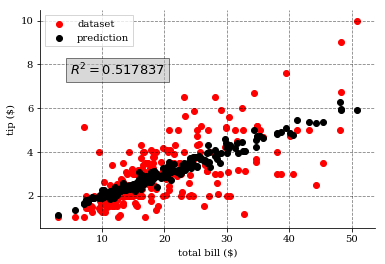

In [327]:
model = LinearRegression()
model.fit(X_train, y_train)

total_bill = sc.inverse_transform(X)[:, 0]
predicted_tip = model.predict(X)

y_pred = model.predict(X_test)

pl.scatter(total_bill, y, color="red", label="dataset")
pl.scatter(total_bill, predicted_tip, color="black", label="prediction")

r2 = r2_score(y_test, y_pred)

pl.text(5, 7.5, f"$R^2={r2:g}$", fontsize=13, bbox=dict(facecolor='.7', alpha=0.5))
pl.xlabel("total bill ($)")
pl.ylabel("tip ($)")
pl.legend()

### Suport Vector Machine and Kernel trick

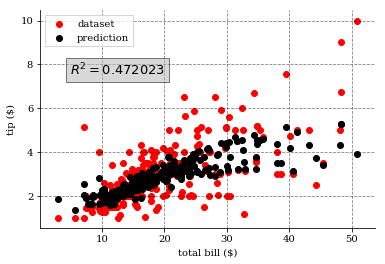

In [328]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

total_bill = sc.inverse_transform(X)[:, 0]
predicted_tip = model.predict(X)

y_pred = model.predict(X_test)

pl.scatter(total_bill, y, color="red", label="dataset")
pl.scatter(total_bill, predicted_tip, color="black", label="prediction")

r2 = r2_score(y_test, y_pred)

pl.text(5, 7.5, f"$R^2={r2:g}$", fontsize=13, bbox=dict(facecolor='.7', alpha=0.5))
pl.xlabel("total bill ($)")
pl.ylabel("tip ($)")
pl.legend()

### Decision tree and Random Forest

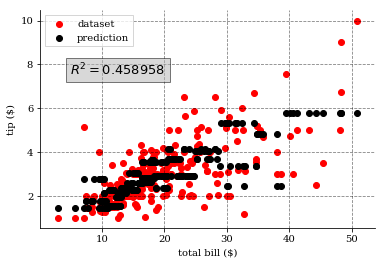

In [329]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(min_samples_leaf=5)  # try with min_samples_leaf=1 and X/y
model.fit(X_train, y_train) # Try with X and y

total_bill = sc.inverse_transform(X)[:, 0]
predicted_tip = model.predict(X)

y_pred = model.predict(X_test)

pl.scatter(total_bill, y, color="red", label="dataset")
pl.scatter(total_bill, predicted_tip, color="black", label="prediction")

r2 = r2_score(y_test, y_pred)

pl.text(5, 7.5, f"$R^2={r2:g}$", fontsize=13, bbox=dict(facecolor='.7', alpha=0.5))
pl.xlabel("total bill ($)")
pl.ylabel("tip ($)")
pl.legend()

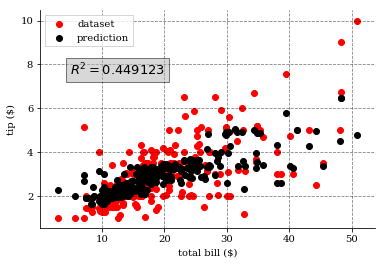

In [330]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

total_bill = sc.inverse_transform(X)[:, 0]
predicted_tip = model.predict(X)

y_pred = model.predict(X_test)

pl.scatter(total_bill, y, color="red", label="dataset")
pl.scatter(total_bill, predicted_tip, color="black", label="prediction")

r2 = r2_score(y_test, y_pred)

pl.text(5, 7.5, f"$R^2={r2:g}$", fontsize=13, bbox=dict(facecolor='.7', alpha=0.5))
pl.xlabel("total bill ($)")
pl.ylabel("tip ($)")
pl.legend()

## Classification - Who has a pickup?